In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline

In [4]:
data = pd.read_csv('C:/Users/amit8/Desktop/HeartDisease.csv')

# Display first few rows to understand the data
print("First few rows of the dataset:")
print(data.head())

# Display basic info about the dataset
print("\nDataset Information:")
print(data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

First few rows of the dataset:
   HeartDiseaseorAttack  HighBP  HighChol   BMI  Smoker  Diabetes  \
0                   0.0     1.0       1.0  40.0     1.0       0.0   
1                   0.0     0.0       0.0  25.0     1.0       0.0   
2                   0.0     1.0       1.0  28.0     0.0       0.0   
3                   0.0     1.0       0.0  27.0     0.0       0.0   
4                   0.0     1.0       1.0  24.0     0.0       0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  MentHlth  PhysHlth  Sex  \
0           0.0     0.0      1.0                0.0      18.0      15.0  0.0   
1           1.0     0.0      0.0                0.0       0.0       0.0  0.0   
2           0.0     1.0      0.0                0.0      30.0      30.0  0.0   
3           1.0     1.0      1.0                0.0       0.0       0.0  0.0   
4           1.0     1.0      1.0                0.0       3.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        

In [5]:
# Check for any missing values
print("\nMissing values in each column before handling:")
print(data.isnull().sum())

# Step 1: Identify rows with NaN values
nan_rows = data[data.isnull().any(axis=1)]
print("\nRows with NaN values:")
print(nan_rows)

# Step 2: Convert all columns to numeric, coercing any non-numeric values to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Step 3: Fill remaining NaNs with median values
data.fillna(data.median(), inplace=True)


Missing values in each column before handling:
HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
MentHlth                0
PhysHlth                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Rows with NaN values:
Empty DataFrame
Columns: [HeartDiseaseorAttack, HighBP, HighChol, BMI, Smoker, Diabetes, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, MentHlth, PhysHlth, Sex, Age, Education, Income]
Index: []


In [6]:
# Recheck for missing values again
print("\nMissing values in each column after handling:")
print(data.isnull().sum())

# Ensure there are no NaN values left in the data
print("\nCheck if any NaNs left in the data:")
print(data.isnull().values.any())

# Extra check to identify columns with NaN values after the imputation
columns_with_nan = data.columns[data.isnull().any()].tolist()
print("\nColumns with NaNs after imputation (if any):", columns_with_nan)

# Drop any remaining rows with NaN values if they exist
if data.isnull().values.any():
    data.dropna(inplace=True)
    print("\nDropped remaining rows with NaNs.")
    print("Remaining missing values after dropping:", data.isnull().sum())


Missing values in each column after handling:
HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
MentHlth                0
PhysHlth                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Check if any NaNs left in the data:
False

Columns with NaNs after imputation (if any): []


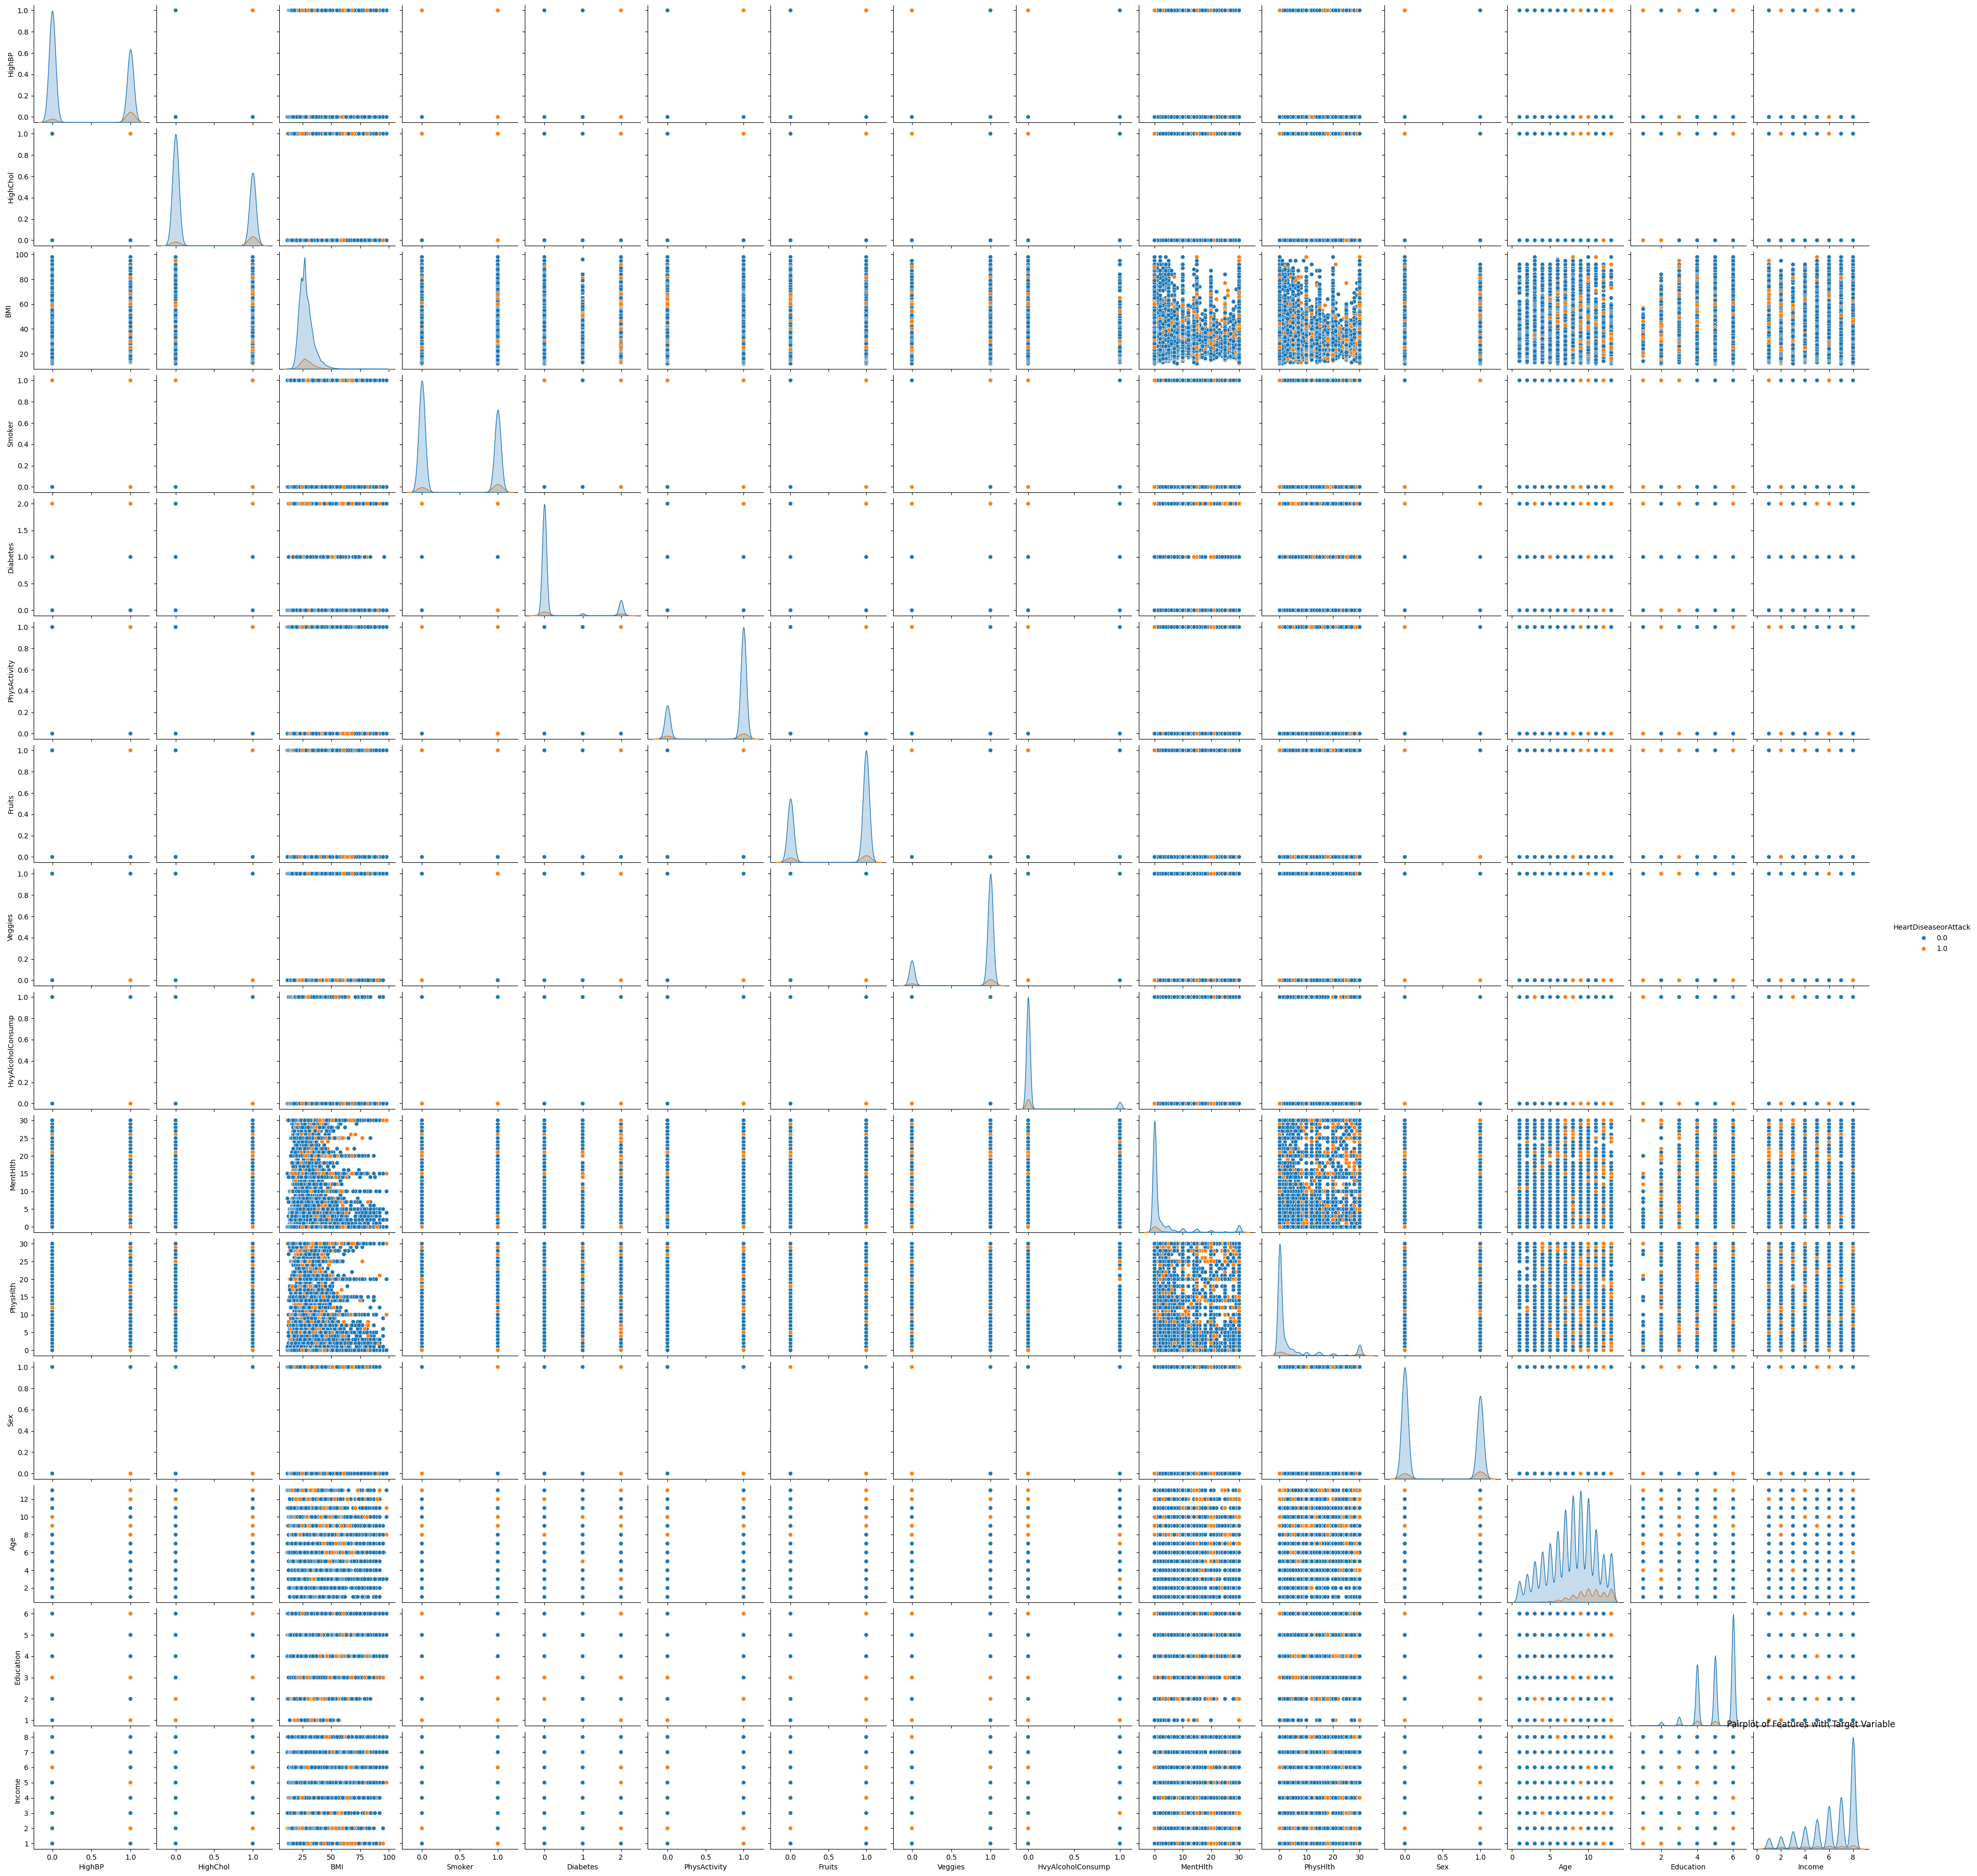

In [7]:
# Pairplot to visualize relationships between variables
sns.pairplot(data, hue="HeartDiseaseorAttack", diag_kind="kde")
plt.title("Pairplot of Features with Target Variable")
plt.show()

In [8]:
# ----- Feature Creation -----
# Creating new feature: 'HighRisk' which combines HighBP, HighChol, Diabetes
data['HighRisk'] = np.where((data['HighBP'] == 1) & (data['HighChol'] == 1) & (data['Diabetes'] == 1), 1, 0)

# Creating new feature: 'UnhealthyHabits' which combines smoking, heavy alcohol consumption, low fruit and vegetable intake
data['UnhealthyHabits'] = np.where((data['Smoker'] == 1) | (data['HvyAlcoholConsump'] == 1) |
                                   (data['Fruits'] == 0) | (data['Veggies'] == 0), 1, 0)

# Display first few rows to check new features
print("\nFirst few rows after feature creation:")
print(data.head())


First few rows after feature creation:
   HeartDiseaseorAttack  HighBP  HighChol   BMI  Smoker  Diabetes  \
0                   0.0     1.0       1.0  40.0     1.0       0.0   
1                   0.0     0.0       0.0  25.0     1.0       0.0   
2                   0.0     1.0       1.0  28.0     0.0       0.0   
3                   0.0     1.0       0.0  27.0     0.0       0.0   
4                   0.0     1.0       1.0  24.0     0.0       0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  MentHlth  PhysHlth  Sex  \
0           0.0     0.0      1.0                0.0      18.0      15.0  0.0   
1           1.0     0.0      0.0                0.0       0.0       0.0  0.0   
2           0.0     1.0      0.0                0.0      30.0      30.0  0.0   
3           1.0     1.0      1.0                0.0       0.0       0.0  0.0   
4           1.0     1.0      1.0                0.0       3.0       0.0  0.0   

    Age  Education  Income  HighRisk  UnhealthyHabits  
0   9.0 

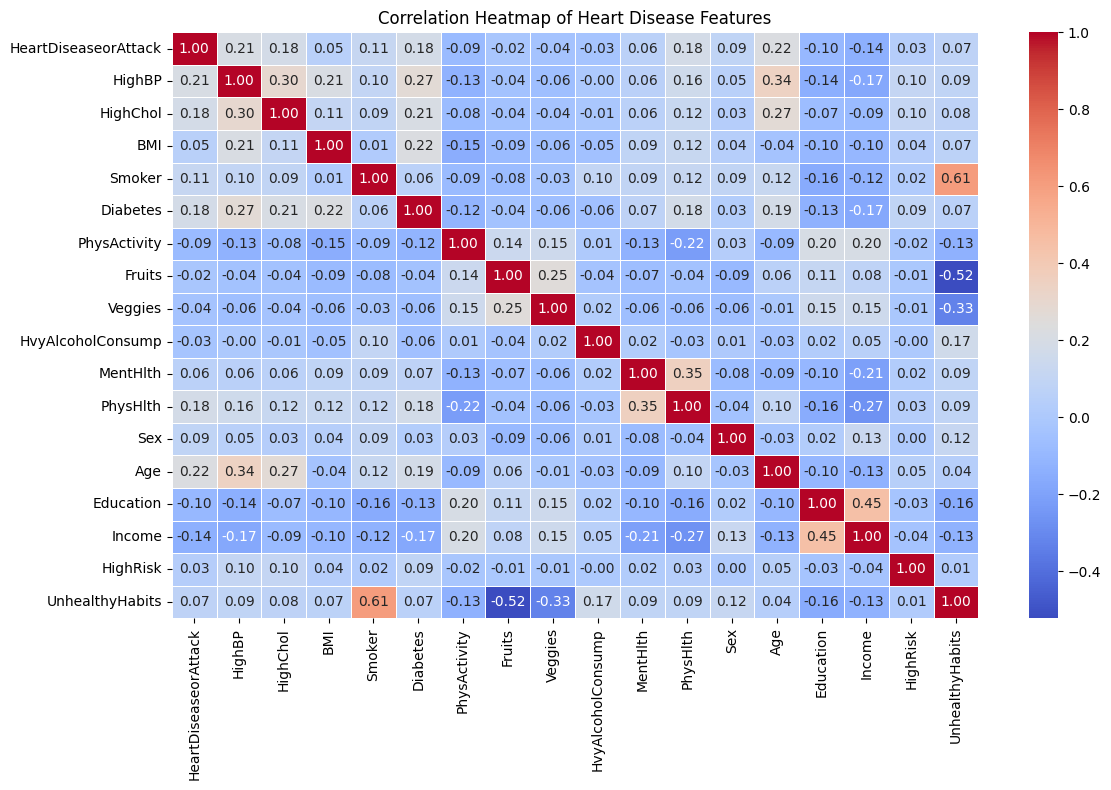

In [9]:
# Generate the correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Heart Disease Features")
plt.tight_layout()
plt.show()

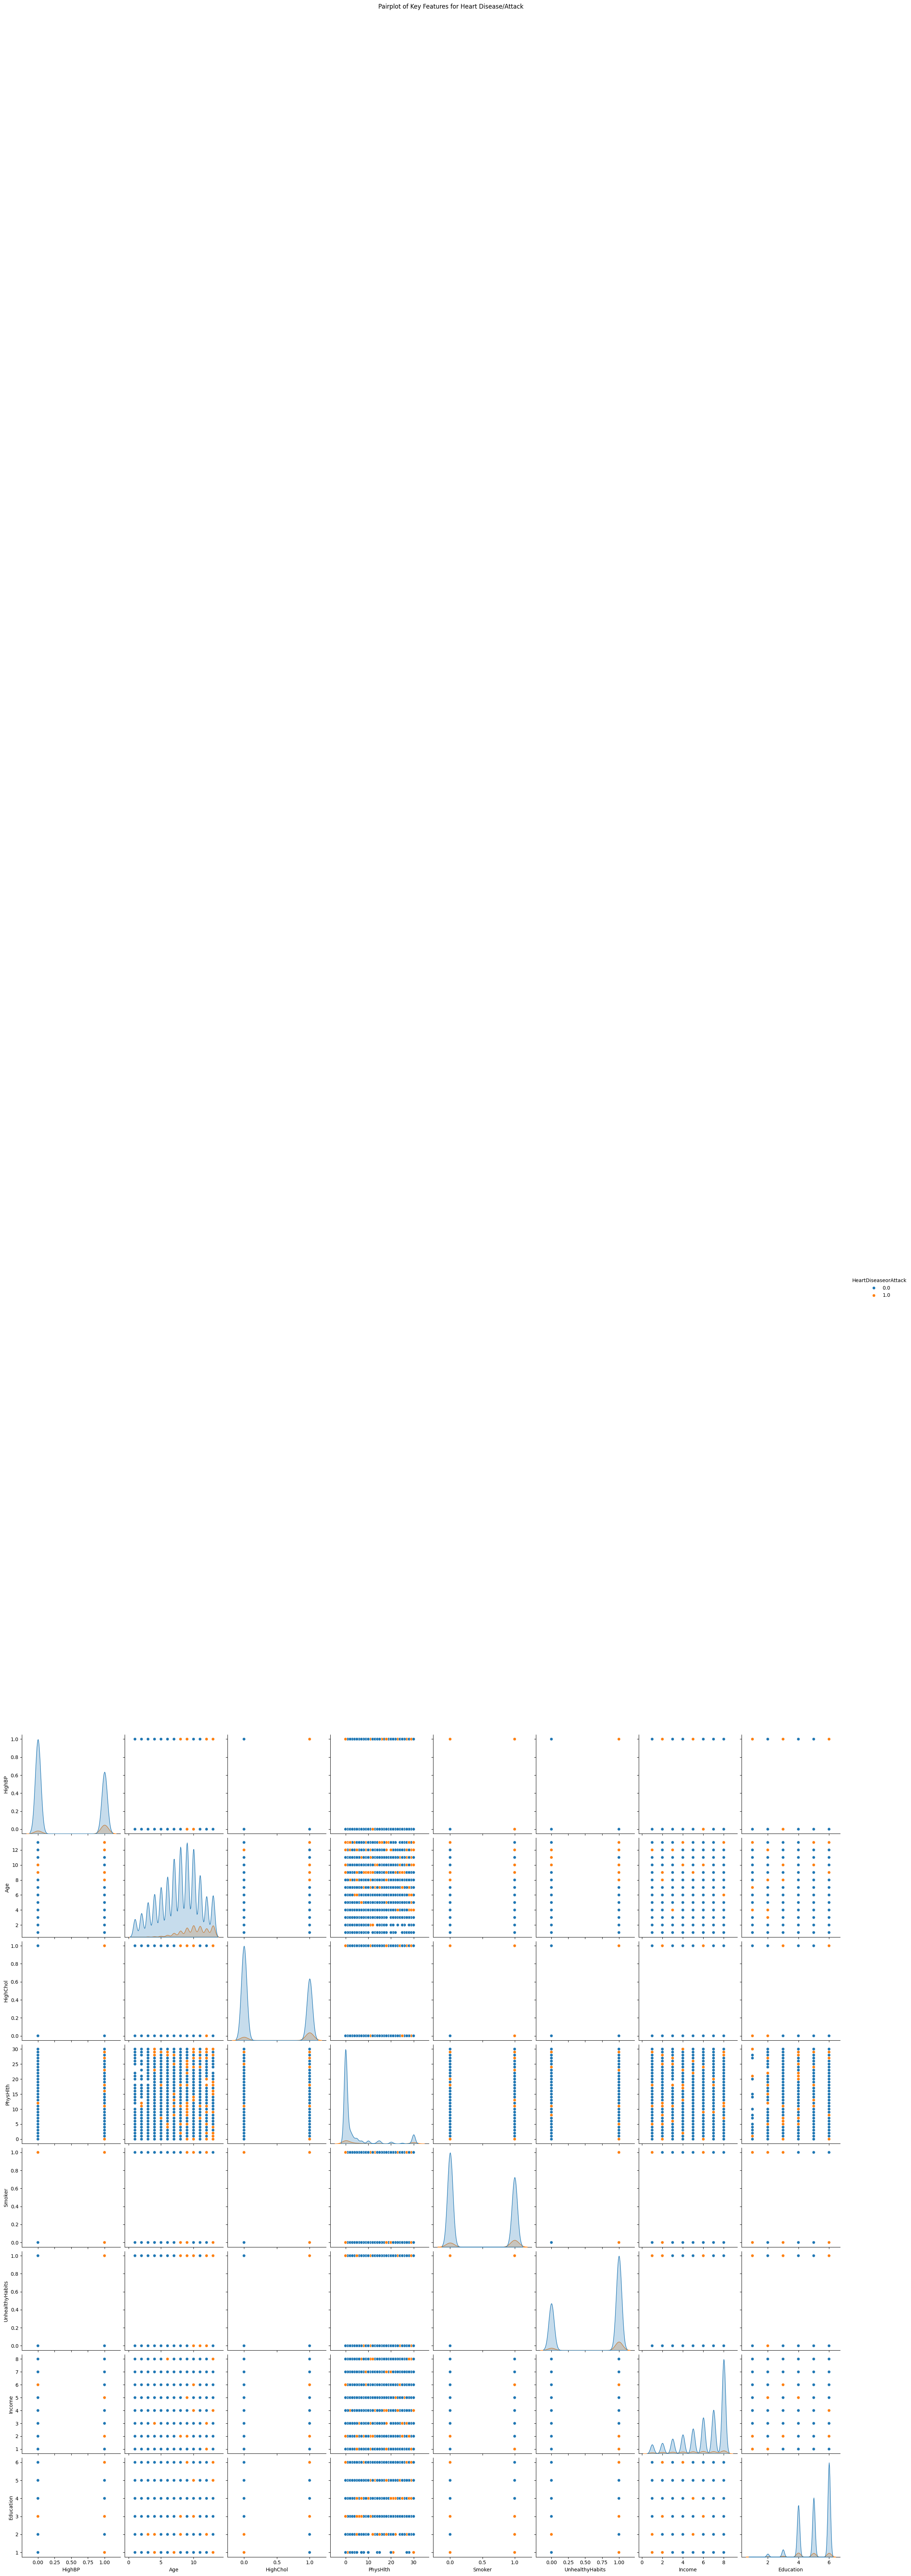

In [10]:
# Select top features based on the heatmap for pairplot
top_features = ['HighBP', 'Age', 'HighChol', 'PhysHlth', 'Smoker', 'UnhealthyHabits', 'Income', 'Education', 'HeartDiseaseorAttack']

# Generate the pairplot with higher resolution
sns.pairplot(data[top_features], hue="HeartDiseaseorAttack", diag_kind="kde", height=3)
plt.suptitle("Pairplot of Key Features for Heart Disease/Attack", y=3)
plt.savefig('pairplot_high_res.png', dpi=300) 
plt.show()

In [11]:
# Preparing the data for modeling
# Splitting data into features (X) and target (y)
X = data.drop('HeartDiseaseorAttack', axis=1)
y = data['HeartDiseaseorAttack']

# Recheck if X has any NaN values
print("Check if X contains any NaN values before SMOTE:")
print(X.isnull().sum())

# Final verification of NaNs in X and y
if X.isnull().values.any() or y.isnull().values.any():
    print("Error: NaN values still exist in X or y. Fix them before proceeding.")
else:
    print("No NaN values in X or y. Proceeding with SMOTE...")

Check if X contains any NaN values before SMOTE:
HighBP               0
HighChol             0
BMI                  0
Smoker               0
Diabetes             0
PhysActivity         0
Fruits               0
Veggies              0
HvyAlcoholConsump    0
MentHlth             0
PhysHlth             0
Sex                  0
Age                  0
Education            0
Income               0
HighRisk             0
UnhealthyHabits      0
dtype: int64
No NaN values in X or y. Proceeding with SMOTE...


In [12]:
# Handling class imbalance using SMOTE
print("Before SMOTE: ", Counter(y))
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("After SMOTE: ", Counter(y_resampled))
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Before SMOTE:  Counter({0.0: 229787, 1.0: 23893})
After SMOTE:  Counter({0.0: 229787, 1.0: 229787})


In [13]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [14]:
# Dictionary to store model performance
model_performance = {}

# Experimenting with models
for name, model in models.items():
    # Create a pipeline with SMOTE, scaling, and modeling
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),  # Add SMOTE inside the pipeline
        ('scaler', StandardScaler()),  # Scaling the data
        ('classifier', model)  # Model
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for precision-recall curve
    
    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Precision-Recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    
    # Store the performance
    model_performance[name] = {
        'ROC AUC': roc_auc,
        'Precision-Recall AUC': pr_auc,
        'Classification Report': classification_report(y_test, y_pred)
    }
    
    # Feature Importance (only for Random Forest)
    if isinstance(model, RandomForestClassifier):  # Only Random Forest has feature importance
        feature_importance = model.feature_importances_
        features = X.columns
        importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        print(f"\nMost Important Features for {name}:")
        print(importance_df)


Most Important Features for Random Forest:
              Feature  Importance
0              HighBP    0.164122
1            HighChol    0.146829
12                Age    0.135260
2                 BMI    0.082909
11                Sex    0.080112
3              Smoker    0.066249
14             Income    0.066143
13          Education    0.048523
5        PhysActivity    0.044072
10           PhysHlth    0.041864
4            Diabetes    0.028860
6              Fruits    0.028288
9            MentHlth    0.024197
7             Veggies    0.022965
8   HvyAlcoholConsump    0.010039
16    UnhealthyHabits    0.007659
15           HighRisk    0.001908


In [15]:
# Display model performance
for model, performance in model_performance.items():
    print(f"\nModel: {model}")
    print(f"ROC AUC Score: {performance['ROC AUC']}")
    print(f"Precision-Recall AUC Score: {performance['Precision-Recall AUC']}")
    print("Classification Report:")
    print(performance['Classification Report'])


Model: Logistic Regression
ROC AUC Score: 0.8433537742329148
Precision-Recall AUC Score: 0.812471856376051
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76     46033
         1.0       0.75      0.80      0.78     45882

    accuracy                           0.77     91915
   macro avg       0.77      0.77      0.77     91915
weighted avg       0.77      0.77      0.77     91915


Model: Random Forest
ROC AUC Score: 0.9809766266697841
Precision-Recall AUC Score: 0.9850314436038778
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     46033
         1.0       0.97      0.91      0.94     45882

    accuracy                           0.94     91915
   macro avg       0.94      0.94      0.94     91915
weighted avg       0.94      0.94      0.94     91915


Model: Support Vector Classifier
ROC AUC Score: 0.9519021524683995
Precision-Recall AUC 

In [16]:

# Determine the best model and most important drivers for heart disease
# RandomForest is typically a good choice for feature importance
best_model = RandomForestClassifier()
best_model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [17]:
# Feature Importance
feature_importance = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
print("\nMost Important Features for Heart Disease or Attack:")
print(importance_df)


Most Important Features for Heart Disease or Attack:
              Feature  Importance
0              HighBP    0.153252
1            HighChol    0.146644
12                Age    0.144107
2                 BMI    0.082923
11                Sex    0.077727
3              Smoker    0.069110
14             Income    0.066564
13          Education    0.049490
5        PhysActivity    0.043087
10           PhysHlth    0.041158
4            Diabetes    0.029990
6              Fruits    0.028458
9            MentHlth    0.024207
7             Veggies    0.024116
8   HvyAlcoholConsump    0.009438
16    UnhealthyHabits    0.007906
15           HighRisk    0.001823


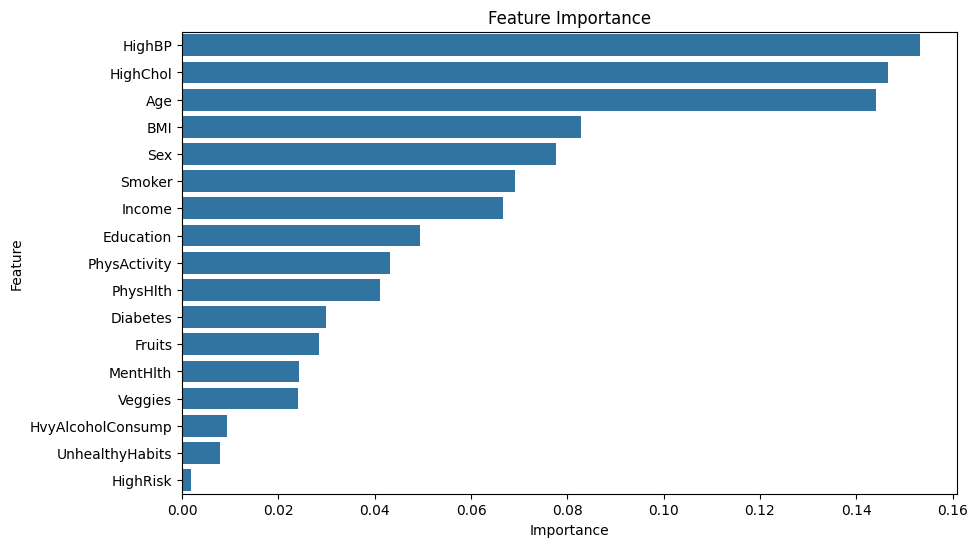

In [18]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider for the best split
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

# Best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC AUC Score: 0.9861399456921569


In [20]:
# Best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Fit the best model on the full training data
best_rf_model.fit(X_train, y_train)

# Evaluate the best model
y_pred = best_rf_model.predict(X_test)
y_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score for the tuned Random Forest model:", roc_auc)

# Print classification report
print(classification_report(y_test, y_pred))


ROC AUC Score for the tuned Random Forest model: 0.981484412312118
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     46033
         1.0       0.97      0.91      0.94     45882

    accuracy                           0.94     91915
   macro avg       0.94      0.94      0.94     91915
weighted avg       0.94      0.94      0.94     91915




Most Important Features for Heart Disease or Attack after tuning:
              Feature  Importance
0              HighBP    0.162125
1            HighChol    0.144591
12                Age    0.138599
2                 BMI    0.082891
11                Sex    0.080214
14             Income    0.066479
3              Smoker    0.064296
13          Education    0.050263
10           PhysHlth    0.045791
5        PhysActivity    0.042946
6              Fruits    0.028856
4            Diabetes    0.026575
9            MentHlth    0.024125
7             Veggies    0.023361
8   HvyAlcoholConsump    0.009387
16    UnhealthyHabits    0.007574
15           HighRisk    0.001926


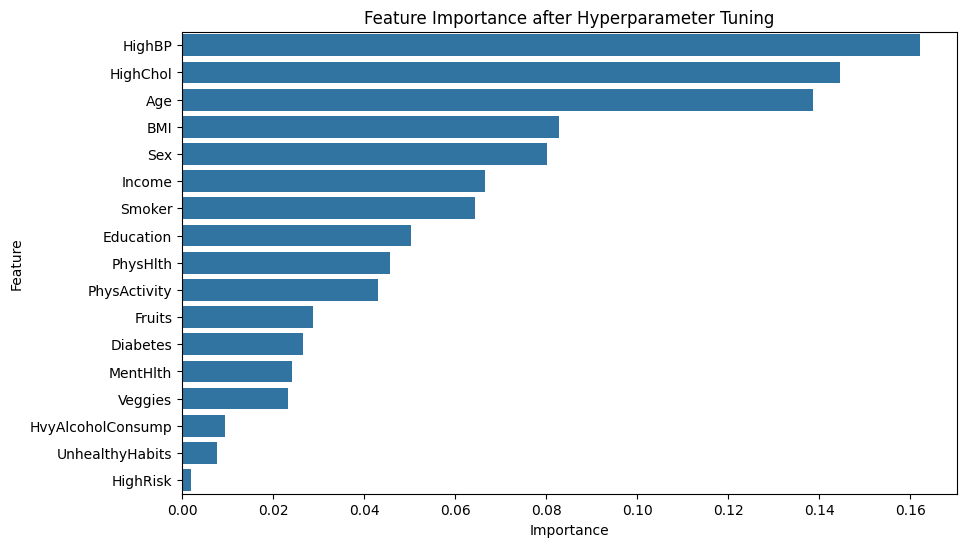

In [21]:
# Feature Importance of the best model
feature_importance = best_rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
print("\nMost Important Features for Heart Disease or Attack after tuning:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance after Hyperparameter Tuning')
plt.show()


In [27]:
from joblib import dump

# Save the best model to a file
dump(best_rf_model, 'best_rf_model.joblib')


['best_rf_model.joblib']

In [30]:
import pickle

with open('model_filename.pkl', 'wb') as file:
    pickle.dump(model, file)
